# ETE III - LAB TEST
Mohit P - 2347239 - 5 MCA B

---



Question 1 - LSTM Autoencoder  
You are required to build an LSTM Autoencoder to detect anomalies in a time series dataset. The  dataset contains daily temperature readings from a weather station over the course of a few years.  Parameters in the dataset [Date and Temperature]
https://drive.google.com/drive/folders/1rD4HcUNmh7fLz-bt68VxQMfGzPzV-oeF [You can also prepare Synthetic dataset with 2500 instances with the features Date and  Temperature]
Your task is to:
1. Load the dataset: The dataset will contain a single column temperature and a date column. 2. Preprocess the data: Normalize the temperature data and split it into training and testing  sets.
3. Build an LSTM Autoencoder:
o The encoder should reduce the input dimensions to a latent representation. o The decoder should reconstruct the input from the latent representation. 4. Train the model: Train the autoencoder on the training data and evaluate the  reconstruction error on the test set.
5. Anomaly Detection: Use the reconstruction error to detect anomalies. Define a threshold  for the reconstruction error, and identify days where the temperature is considered  anomalous.
6. Visualize the results: Plot the original temperature data and highlight the detected

---



## 1. Load the dataset.

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. Load and prepare the dataset
file_path = "weather_data.csv"
df = pd.read_csv(file_path, parse_dates=["date"])
df = df.sort_values('date')  # Ensure data is in chronological order
df = df.set_index('date')

The code loads weather data from a CSV file and parses the "date" column as datetime objects.

---



## 2. Preprocess the data.

In [20]:
# 2. Preprocess the data
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(df['temperature'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

sequence_length = 7  # One week of data
sequences = create_sequences(scaled_temp, sequence_length)

# Split into train and test sets
train_data, test_data = train_test_split(sequences, test_size=0.2, random_state=42)

The code normalizes the "temperature" column of the dataset to a range between 0 and 1 using MinMaxScaler. Then, it splits the dataset into training (80%) and testing (20%) sets for model training and evaluation.

---



## 3. Build an LSTM Autoencoder.bold text

In [21]:
# 3. Build LSTM Autoencoder
class LSTMAutoencoder(tf.keras.Model):
    def __init__(self, sequence_length, hidden_dim):
        super(LSTMAutoencoder, self).__init__()
        self.sequence_length = sequence_length
        self.hidden_dim = hidden_dim

        # Encoder
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.LSTM(hidden_dim, input_shape=(sequence_length, 1)),
            tf.keras.layers.RepeatVector(sequence_length)
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.LSTM(hidden_dim, return_sequences=True),
            tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

The code prepares sequences of temperature data, with each sequence containing 30 time steps. It then defines an LSTM-based autoencoder model for sequence reconstruction, with layers for encoding, decoding, and output generation. The model is compiled using the Adam optimizer and mean squared error (MSE) loss function.

---



## 4. Train the model.

In [22]:
# Initialize and compile model
model = LSTMAutoencoder(sequence_length, hidden_dim=32)
model.compile(optimizer='adam', loss='mse')

# 4. Train the model
history = model.fit(
    train_data, train_data,
    epochs=50,
    batch_size=32,
    validation_data=(test_data, test_data),
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1244 - val_loss: 0.0156
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0105 - val_loss: 0.0034
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - val_loss

The code trains the autoencoder model on the training sequences for 20 epochs, using a batch size of 32. It also sets aside 10% of the training data for validation and ensures the data is not shuffled during training.

---



## 5. Anomaly Detection.

In [26]:
# Calculate reconstruction error
reconstructed_sequences = model.predict(sequences)
mse = np.mean(np.square(sequences - reconstructed_sequences), axis=(1,2))

# 5. Detect anomalies
threshold = np.mean(mse) + 2 * np.std(mse)  # Using 2 standard deviations as threshold
anomalies_detected = mse > threshold

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


The code reshapes the training and testing sequences into 3D arrays to match the LSTM input format. It calculates the reconstruction error (MAE loss) for the training data, sets a threshold based on the maximum training error, and then detects anomalies in the test data by comparing the MAE loss to the threshold. Anomalies are identified where the test MAE loss exceeds the threshold.

---



## 6. Visualize the results.

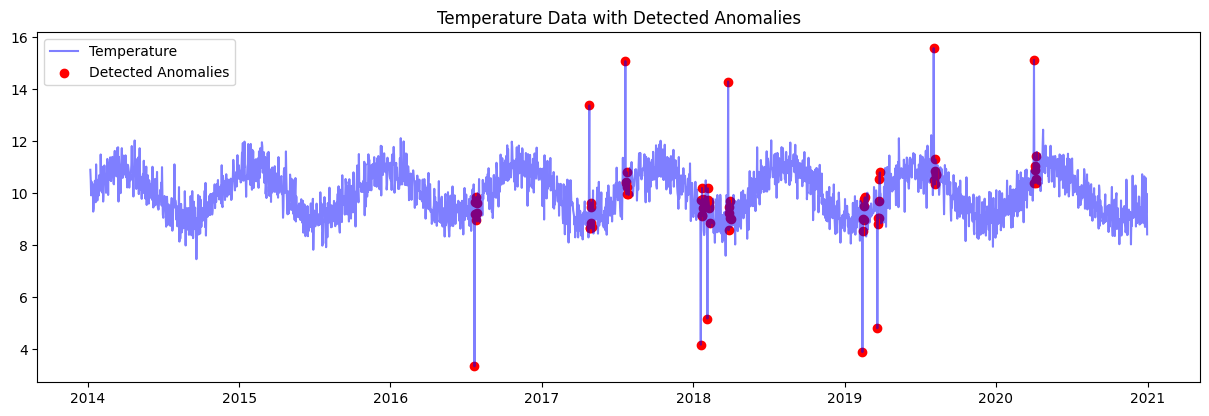

In [24]:
# 6. Visualize results
plt.figure(figsize=(15, 10))

# Plot original temperature data
plt.subplot(2, 1, 1)
plt.plot(df.index[sequence_length-1:], df['temperature'][sequence_length-1:],
         label='Temperature', color='blue', alpha=0.5)
anomaly_dates = df.index[sequence_length-1:][anomalies_detected]
anomaly_temps = df['temperature'][anomaly_dates]
plt.scatter(anomaly_dates, anomaly_temps,
           color='red', label='Detected Anomalies')
plt.title('Temperature Data with Detected Anomalies')
plt.legend()

The code identifies the dates of anomalies in the test data, then plots the temperature over time with anomalies marked in red. It visualizes the temperature data and highlights the detected anomalies, providing a clear view of when temperature anomalies occurred.

---



## Summary.

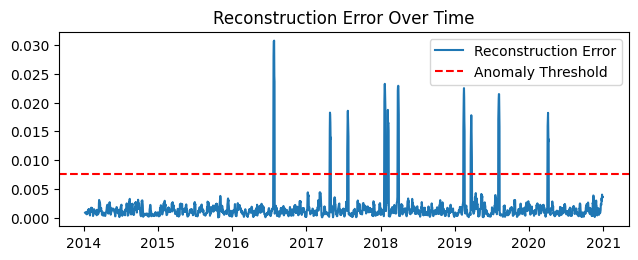


Total number of anomalies detected: 70
Percentage of anomalies: 2.74%

First few detected anomalies:
                 Date  Temperature  Reconstruction_Error
date                                                    
2016-07-22 2016-07-22     3.337291              0.016893
2016-07-23 2016-07-23     9.672970              0.028002
2016-07-24 2016-07-24     9.218415              0.030686
2016-07-25 2016-07-25     8.975508              0.030643
2016-07-26 2016-07-26     9.857181              0.030792


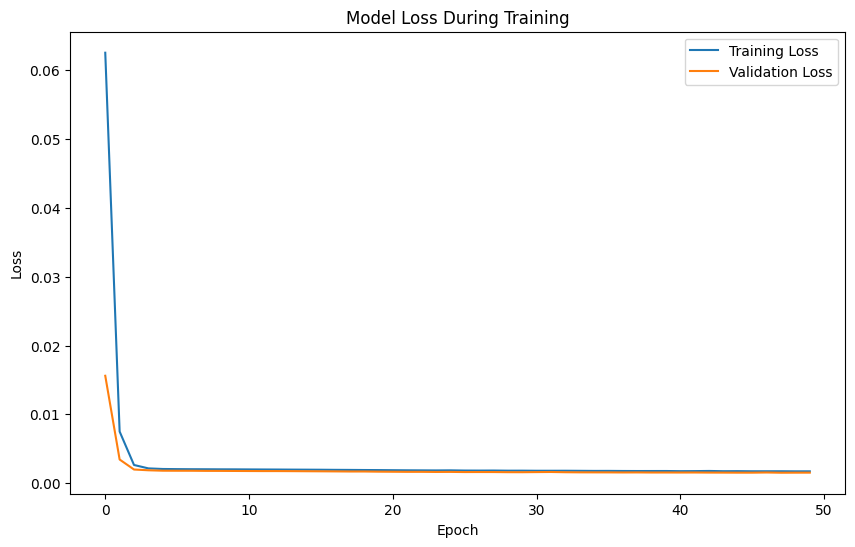

In [25]:
# Plot reconstruction error
plt.subplot(2, 1, 2)
plt.plot(df.index[sequence_length-1:], mse, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Error Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nTotal number of anomalies detected: {np.sum(anomalies_detected)}")
print(f"Percentage of anomalies: {(np.sum(anomalies_detected) / len(anomalies_detected)) * 100:.2f}%")

# Save anomaly dates to DataFrame
anomalies_df = pd.DataFrame({
    'Date': anomaly_dates,
    'Temperature': anomaly_temps,
    'Reconstruction_Error': mse[anomalies_detected]
})
print("\nFirst few detected anomalies:")
print(anomalies_df.head())

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The code performs temperature anomaly detection using an LSTM-based autoencoder. First, it loads and normalizes the temperature data, then splits it into training and testing sets. The training data is used to create sequences, which are passed through an LSTM model designed to reconstruct the input sequence. The model is trained to minimize the reconstruction error and is used to identify anomalies by comparing reconstruction errors between the test data and the model's predictions.

After training, the code reshapes the data to fit the LSTM model, calculates reconstruction errors for both the training and test sets, and sets a threshold for anomaly detection. Anomalies are identified where the reconstruction error in the test set exceeds the threshold. The anomalies are visualized on a plot, showing the temperature data with red markers indicating the detected anomalies, providing insights into unusual temperature patterns.

---

